In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('groovy-1_6_BETA_1.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,experimental/groovy/lang/MOP.java,0,1,165,1,15,1,3,15,1,...,0.987879,0.5,0,1,2,1,False,0,False,0
1,experimental/groovy/lang/NewMetaClass.java,0,2,341,1,0,1,3,59,1,...,1.000000,0.0,0,1,0,0,False,0,False,0
2,experimental/org/codehaus/groovy/runtime/MetaC...,0,2,32,1,0,1,0,2,1,...,1.000000,0.0,0,1,0,0,False,0,False,0
3,experimental/org/codehaus/groovy/runtime/MetaC...,7,18,382,13,0,1,3,42,4,...,1.000000,0.0,0,1,0,0,False,0,False,0
4,experimental/org/codehaus/groovy/runtimemetacl...,0,5,70,2,0,1,0,6,1,...,1.000000,0.0,0,1,0,0,False,0,False,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       821 non-null    object 
 1   CountDeclMethodPrivate     821 non-null    int64  
 2   AvgLineCode                821 non-null    int64  
 3   CountLine                  821 non-null    int64  
 4   MaxCyclomatic              821 non-null    int64  
 5   CountDeclMethodDefault     821 non-null    int64  
 6   AvgEssential               821 non-null    int64  
 7   CountDeclClassVariable     821 non-null    int64  
 8   SumCyclomaticStrict        821 non-null    int64  
 9   AvgCyclomatic              821 non-null    int64  
 10  AvgLine                    821 non-null    int64  
 11  CountDeclClassMethod       821 non-null    int64  
 12  AvgLineComment             821 non-null    int64  
 13  AvgCyclomaticModified      821 non-null    int64  

In [3]:
df.shape

(821, 70)

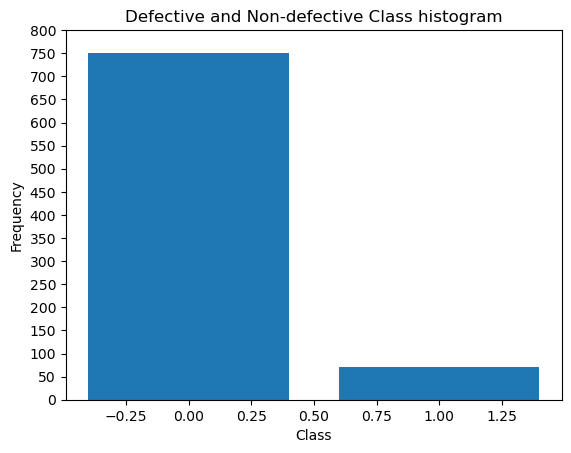

In [4]:
#Defective and Non-defective Class histogram
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Defective and Non-defective Class histogram')
plt.xticks(rotation=0)
# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 50))
# show the grid
# plt.grid(axis='y')
plt.show()


In [5]:
class_counts

RealBug
False    751
True      70
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

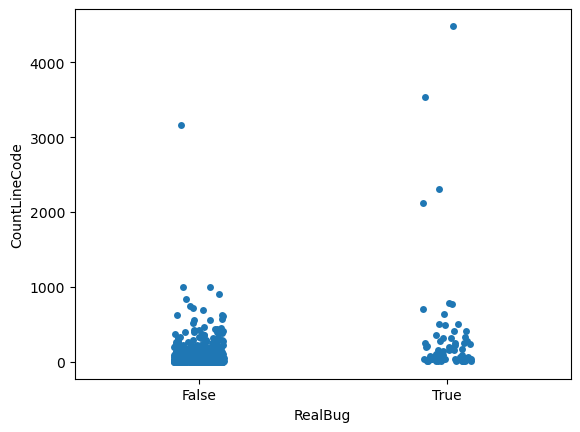

In [6]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

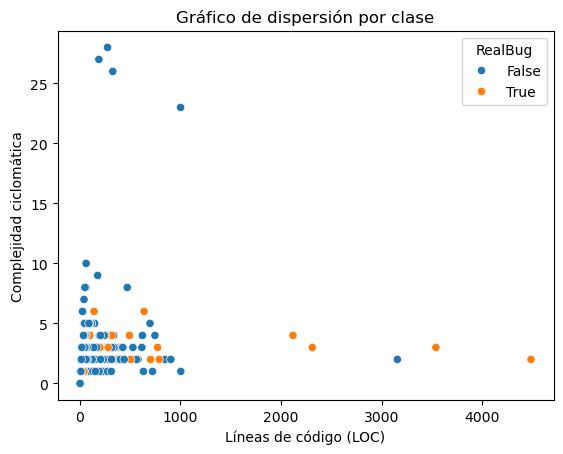

In [7]:
    # Suponiendo que las columnas relevantes para la visualización se llaman 'metric_1', 'metric_2' y 'class'
# Reemplaza 'metric_1' y 'metric_2' con los nombres reales de las columnas que quieres visualizar.
# 'class' es la columna que contiene la etiqueta de clase (defecto o no defecto).
sns.scatterplot(x='CountLineCode', y='AvgCyclomatic', hue='RealBug', data=df)

# Añadir títulos y etiquetas
plt.title('Gráfico de dispersión por clase')
plt.xlabel('Líneas de código (LOC)')
plt.ylabel('Complejidad ciclomática')
plt.show()